In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
import warnings
warnings.filterwarnings("ignore")

In [176]:
ad_pr = pd.read_csv("Admission_Predict.csv", header=None)
df = pd.DataFrame(ad_pr)
df.columns=df.iloc[0]
df.drop(0,axis=0,inplace=True)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
1,1,337,118,4,4.5,4.5,9.65,1,0.92
2,2,324,107,4,4,4.5,8.87,1,0.76
3,3,316,104,3,3,3.5,8,1,0.72
4,4,322,110,3,3.5,2.5,8.67,1,0.8
5,5,314,103,2,2,3,8.21,0,0.65


In [177]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400,400,400,400,400,400,400,400,400
unique,400,49,29,5,9,9,168,2,60
top,1,324,110,3,4,3,8,1,0.64
freq,1,19,37,133,70,85,9,219,17


In [178]:
df.shape

(400, 9)

In [179]:
df.isnull().sum()

0
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<AxesSubplot:ylabel='Density'>

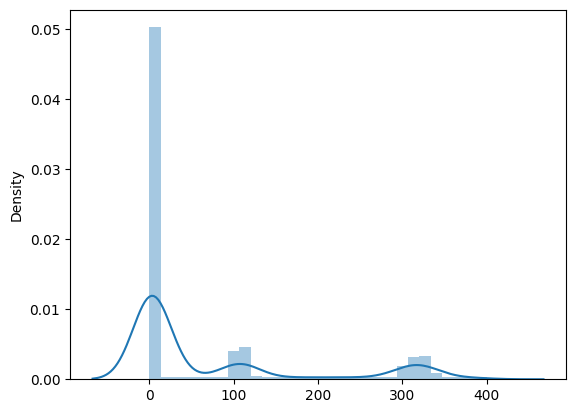

In [180]:
sns.distplot(df)

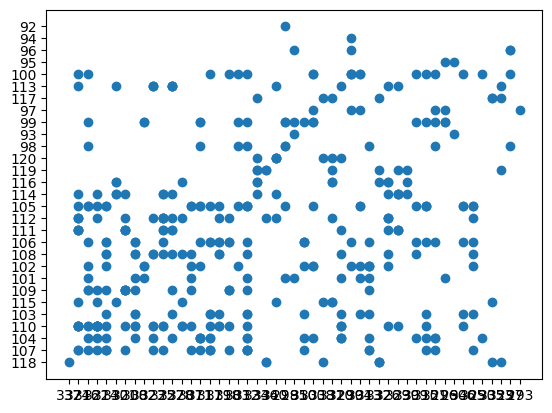

In [181]:
plt.scatter(df['GRE Score'],df['TOEFL Score'])

In [182]:
names=['GRE Score','TOEFL Score','University Rating','SOP','CGPA','Research']
target=['Chance of Admit ']
x = df[names]
y = df[target] 

In [183]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [184]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [191]:
L1=Lasso()
L1.fit(x_train,y_train)

Lasso()

In [199]:
y_pred1 = L1.predict(x_test)
print("Before Parameter Tuning:")
print("r2_Score:",r2_score(y_test,y_pred1))
print("MAE:",mean_absolute_error(y_test,y_pred1))

Before Parameter Tuning:
r2_Score: -0.014549580909342108
MAE: 0.1140171875


In [193]:
param = {
    'alpha':[.00001, 0.0001,0.001, 0.01],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'positive':[True,False],
    'selection':['cyclic','random'],
    }

In [194]:
from sklearn.linear_model import Lasso
L2=Lasso()
search = GridSearchCV(L, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(x,y)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.04704464370254831
Best Hyperparameters: {'alpha': 0.001, 'fit_intercept': True, 'normalize': False, 'positive': True, 'selection': 'cyclic'}


In [195]:
L2 = Lasso(alpha=0.001,fit_intercept= True, normalize = True, positive= False, selection = 'cyclic')

In [198]:
L2.fit(x_train,y_train)
y_pred2 = L2.predict(x_test)
print("After Parameter Tuning:")
print("r2_Score:",r2_score(y_test,y_pred2))
print("MAE:",mean_absolute_error(y_test,y_pred2))

After Parameter Tuning:
r2_Score: 0.6957127851987943
MAE: 0.05717502578945981
